In [56]:
import pandas as pd
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt
from IPython.display import Markdown

In [33]:
raw = pd.read_excel('Working in Theatre_Coding_Jenna.xlsx')
print(raw.shape)
raw.columns

(70, 20)


Index(['Timestamp', 'Email Address', 'Name', 'Year graduated or expected',
       'Entertainment industry/industry related jobs within the last 2 years',
       'Current entertainment industry/industry related job',
       'Future entertainment industry/industry related jobs lined up',
       'Job Discipline_Coding', 'IndustryJobs_Coding',
       'Why did you choose UMD for theatre?', 'WhyUMD_Coding',
       'What do you see the job future of the entertainment industry looking like in 5 years? ',
       'Contact info - if you want to share it.',
       'Were the expectations you had for your theatre education met at UMD?',
       'exceeded',
       'What experiences and/or opportunities offered in your theatre education at UMD were most valuable to you?',
       'ValuableExp_Coding',
       'In what ways have the creative tools of this degree aided in your previous/current/future employment? (Related and/or Non-Industry Related)',
       'Transferrable_Coding', 'Coding'],
      dtype='

In [34]:
# Creating the dictionary for renaming
cols = {
    'Timestamp': 'Time',
    'Email Address': 'Email',
    'Name': 'Name',
    'Year graduated or expected': 'GradYear',
    'Entertainment industry/industry related jobs within the last 2 years': 'RecentJobs',
    'Current entertainment industry/industry related job': 'CurrentJob',
    'Future entertainment industry/industry related jobs lined up': 'FutureJobs',
    'Why did you choose UMD for theatre?': 'WhyUMD',
    'What do you see the job future of the entertainment industry looking like in 5 years? ': 'FutureEntInd',
    'Contact info - if you want to share it.': 'ContactInfo',
    'Were the expectations you had for your theatre education met at UMD?': 'ExpectationsMet',
    'What experiences and/or opportunities offered in your theatre education at UMD were most valuable to you?': 'ValuableExperiences',
    'In what ways have the creative tools of this degree aided in your previous/current/future employment? (Related and/or Non-Industry Related)': 'DegreeImpact'
}

# Renaming the columns
data = raw.rename(columns=cols)
data.columns

Index(['Time', 'Email', 'Name', 'GradYear', 'RecentJobs', 'CurrentJob',
       'FutureJobs', 'Job Discipline_Coding', 'IndustryJobs_Coding', 'WhyUMD',
       'WhyUMD_Coding', 'FutureEntInd', 'ContactInfo', 'ExpectationsMet',
       'exceeded', 'ValuableExperiences', 'ValuableExp_Coding', 'DegreeImpact',
       'Transferrable_Coding', 'Coding'],
      dtype='object')

In [35]:
# Function to extract the first four-digit number from a string
def extract_year(value):
    if pd.isnull(value):
        return None
    match = re.search(r'\d{4}', str(value))
    return int(match.group()) if match else None

# Apply the function to the 'GradYear' column
data['GradYear'] = data['GradYear'].apply(extract_year)

# Convert only non-null values to integers
data['GradYear'] = data['GradYear'].dropna().astype('Int64')

# Display the first few rows to verify the changes
data.GradYear.value_counts()

2021    8
2013    6
2017    6
2010    6
2020    5
2011    4
2023    4
2018    3
2019    3
2015    3
2016    2
2022    2
2024    2
2009    2
1989    2
1993    2
1996    1
2025    1
2014    1
2005    1
2004    1
2008    1
2000    1
1991    1
Name: GradYear, dtype: Int64

In [36]:
these_years = [2018, 2019, 2020, 2021, 2022]

In [37]:
five = data[data['GradYear'].isin(these_years)]
five.shape

(21, 20)

In [38]:
five.to_csv("Just_Five.csv", index=False)

In [39]:
five.columns

Index(['Time', 'Email', 'Name', 'GradYear', 'RecentJobs', 'CurrentJob',
       'FutureJobs', 'Job Discipline_Coding', 'IndustryJobs_Coding', 'WhyUMD',
       'WhyUMD_Coding', 'FutureEntInd', 'ContactInfo', 'ExpectationsMet',
       'exceeded', 'ValuableExperiences', 'ValuableExp_Coding', 'DegreeImpact',
       'Transferrable_Coding', 'Coding'],
      dtype='object')

In [40]:
no_pro = five['Job Discipline_Coding'].isna().sum()
print(no_pro)

0


In [41]:
performers = five['Job Discipline_Coding'].str.contains('performer', na=False).sum()
print(performers)

11


In [42]:
educators = five['Job Discipline_Coding'].str.contains('educat', na=False).sum()
print(educators)

5


In [43]:
designers = five['Job Discipline_Coding'].str.contains('design', na=False).sum()
print(designers)

1


In [44]:
producers = five['Job Discipline_Coding'].str.contains('produc', na=False).sum()
print(producers)

1


In [45]:
managers = five['Job Discipline_Coding'].str.contains('manag', na=False).sum()
print(managers)

5


In [46]:
techies = five['Job Discipline_Coding'].str.contains('techn', na=False).sum()
print(techies)

7


In [47]:
choreographers = five['Job Discipline_Coding'].str.contains('choreo', na=False).sum()
print(choreographers)

3


In [48]:
directors = five['Job Discipline_Coding'].str.contains('direct', na=False).sum()
print(directors)

4


In [49]:
administrators = five['Job Discipline_Coding'].str.contains('admini', na=False).sum()
print(administrators)

1


In [50]:
writers = five['Job Discipline_Coding'].str.contains('writ', na=False).sum()
print(writers)

2


In [51]:
all_jobs = five['Job Discipline_Coding'].value_counts()
all_jobs

performer-stage                                                             3
technician-costume                                                          2
performer-stage, choreographer                                              1
stage manager, technician-carpenter, technician-scenic artist, stagehand    1
performer-screen, performer-stage, director, educator                       1
performer-screen, performer-stage, educator-teching artist                  1
performer-stage, writer, performer-screen                                   1
technician-carpenter, technical director                                    1
stage manager                                                               1
choreographer, educator-vocal coach                                         1
performer-screen, producer-screen, screenwriter, director                   1
performer-stage, house manager, director                                    1
design-set, technician-scenic artist                            

In [52]:
# Function to clean and split text into words
def clean_and_split(text):
    # Remove special characters and split into words
    words = re.findall(r'\b\w+\b', text.lower())
    return words

# Concatenate all text in the 'Job Discipline_Coding' column and split into words
all_text = ' '.join(five['Job Discipline_Coding'].dropna())
words_list = clean_and_split(all_text)

# Count the frequency of each word
word_freq = Counter(words_list)

# Display the 10 most common words for a quick check
word_freq.most_common(10)


[('performer', 14),
 ('stage', 13),
 ('technician', 8),
 ('educator', 5),
 ('screen', 5),
 ('manager', 4),
 ('director', 4),
 ('artist', 4),
 ('choreographer', 3),
 ('carpenter', 3)]

In [54]:
markdown_text = f"""

## Insights from last 5 years of graduates:
- 21 Respondents
- All 21 have worked in the industry during this period
  - 11 have found work as Performers
  - 7 have found work as Technicians
  - 5 have found work in Arts Management & Administration
  - 5 have found work as Educators
  - 4 have found work as Directors
  - 3 have found work as Choreographers
  - 2 have found work as Writers
  - 1 has found work as a Designer
  - 1 has found work as a Producer
  - **12 of the 21 found work in 2 or more of these areas**
  
"""

Markdown(markdown_text)



## Insights from last 5 years of graduates:
- 21 Respondents
- All 21 have worked in the industry during this period
  - 11 have found work as Performersy
  - 7 have found work as Technicians
  - 5 have found work in Arts Management & Administration
  - 5 have found work as Educators
  - 4 have found work as Directors
  - 3 have found work as Choreographers
  - 2 have found work as Writers
  - 1 has found work as a Designer
  - 1 has found work as a Producer
  - **12 of the 21 found work in 2 or more of these areas**
  


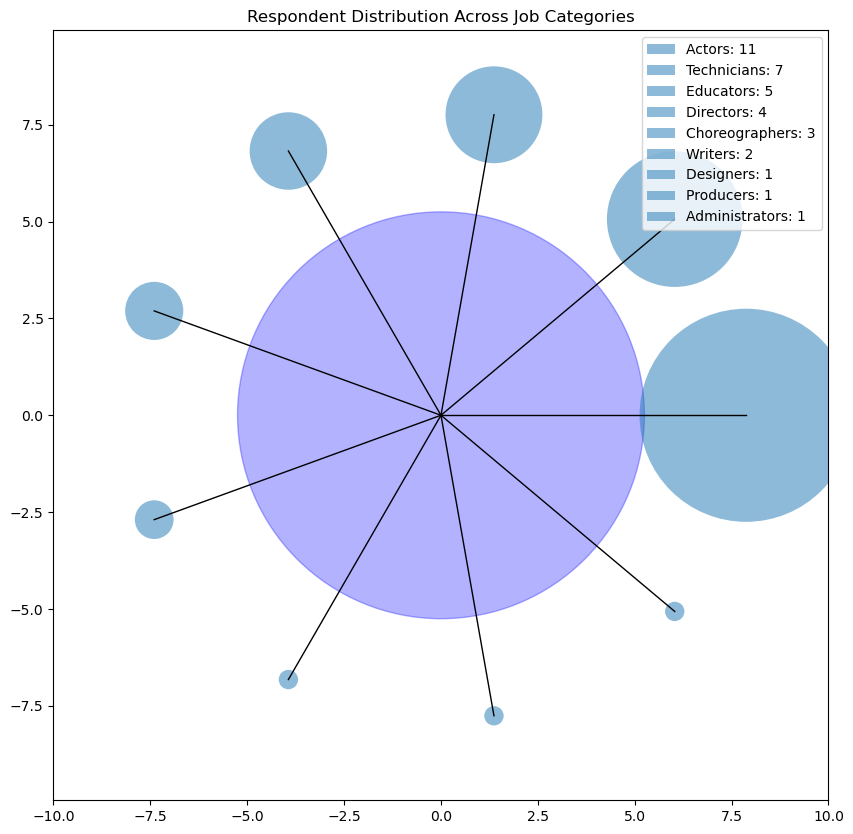

In [57]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from math import pi

# Data for the visualization
categories = ['Actors', 'Technicians', 'Educators', 'Directors', 
              'Choreographers', 'Writers', 'Designers', 'Producers', 'Administrators']
counts = [11, 7, 5, 4, 3, 2, 1, 1, 1]
total_respondents = 21

# Setting up the figure
plt.figure(figsize=(10, 10))
ax = plt.gca()

# Central circle representing total respondents
central_circle = plt.Circle((0, 0), total_respondents/4, color='blue', alpha=0.3)
ax.add_patch(central_circle)

# Adding smaller circles for each category
angle = 0
for category, count in zip(categories, counts):
    # Position and size of the circle
    x = 1.5 * (total_respondents/4) * np.cos(angle)
    y = 1.5 * (total_respondents/4) * np.sin(angle)
    radius = count/4
    circle = plt.Circle((x, y), radius, label=f'{category}: {count}', alpha=0.5)

    # Add circle to the plot
    ax.add_patch(circle)

    # Connect the circle to the center
    plt.plot([0, x], [0, y], 'k-', lw=1)

    # Update angle for the next circle
    angle += 2 * pi / len(categories)

# Set limits and labels
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_aspect('equal', adjustable='datalim')
plt.title('Respondent Distribution Across Job Categories')
plt.legend(loc='upper right')

# Show the plot
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


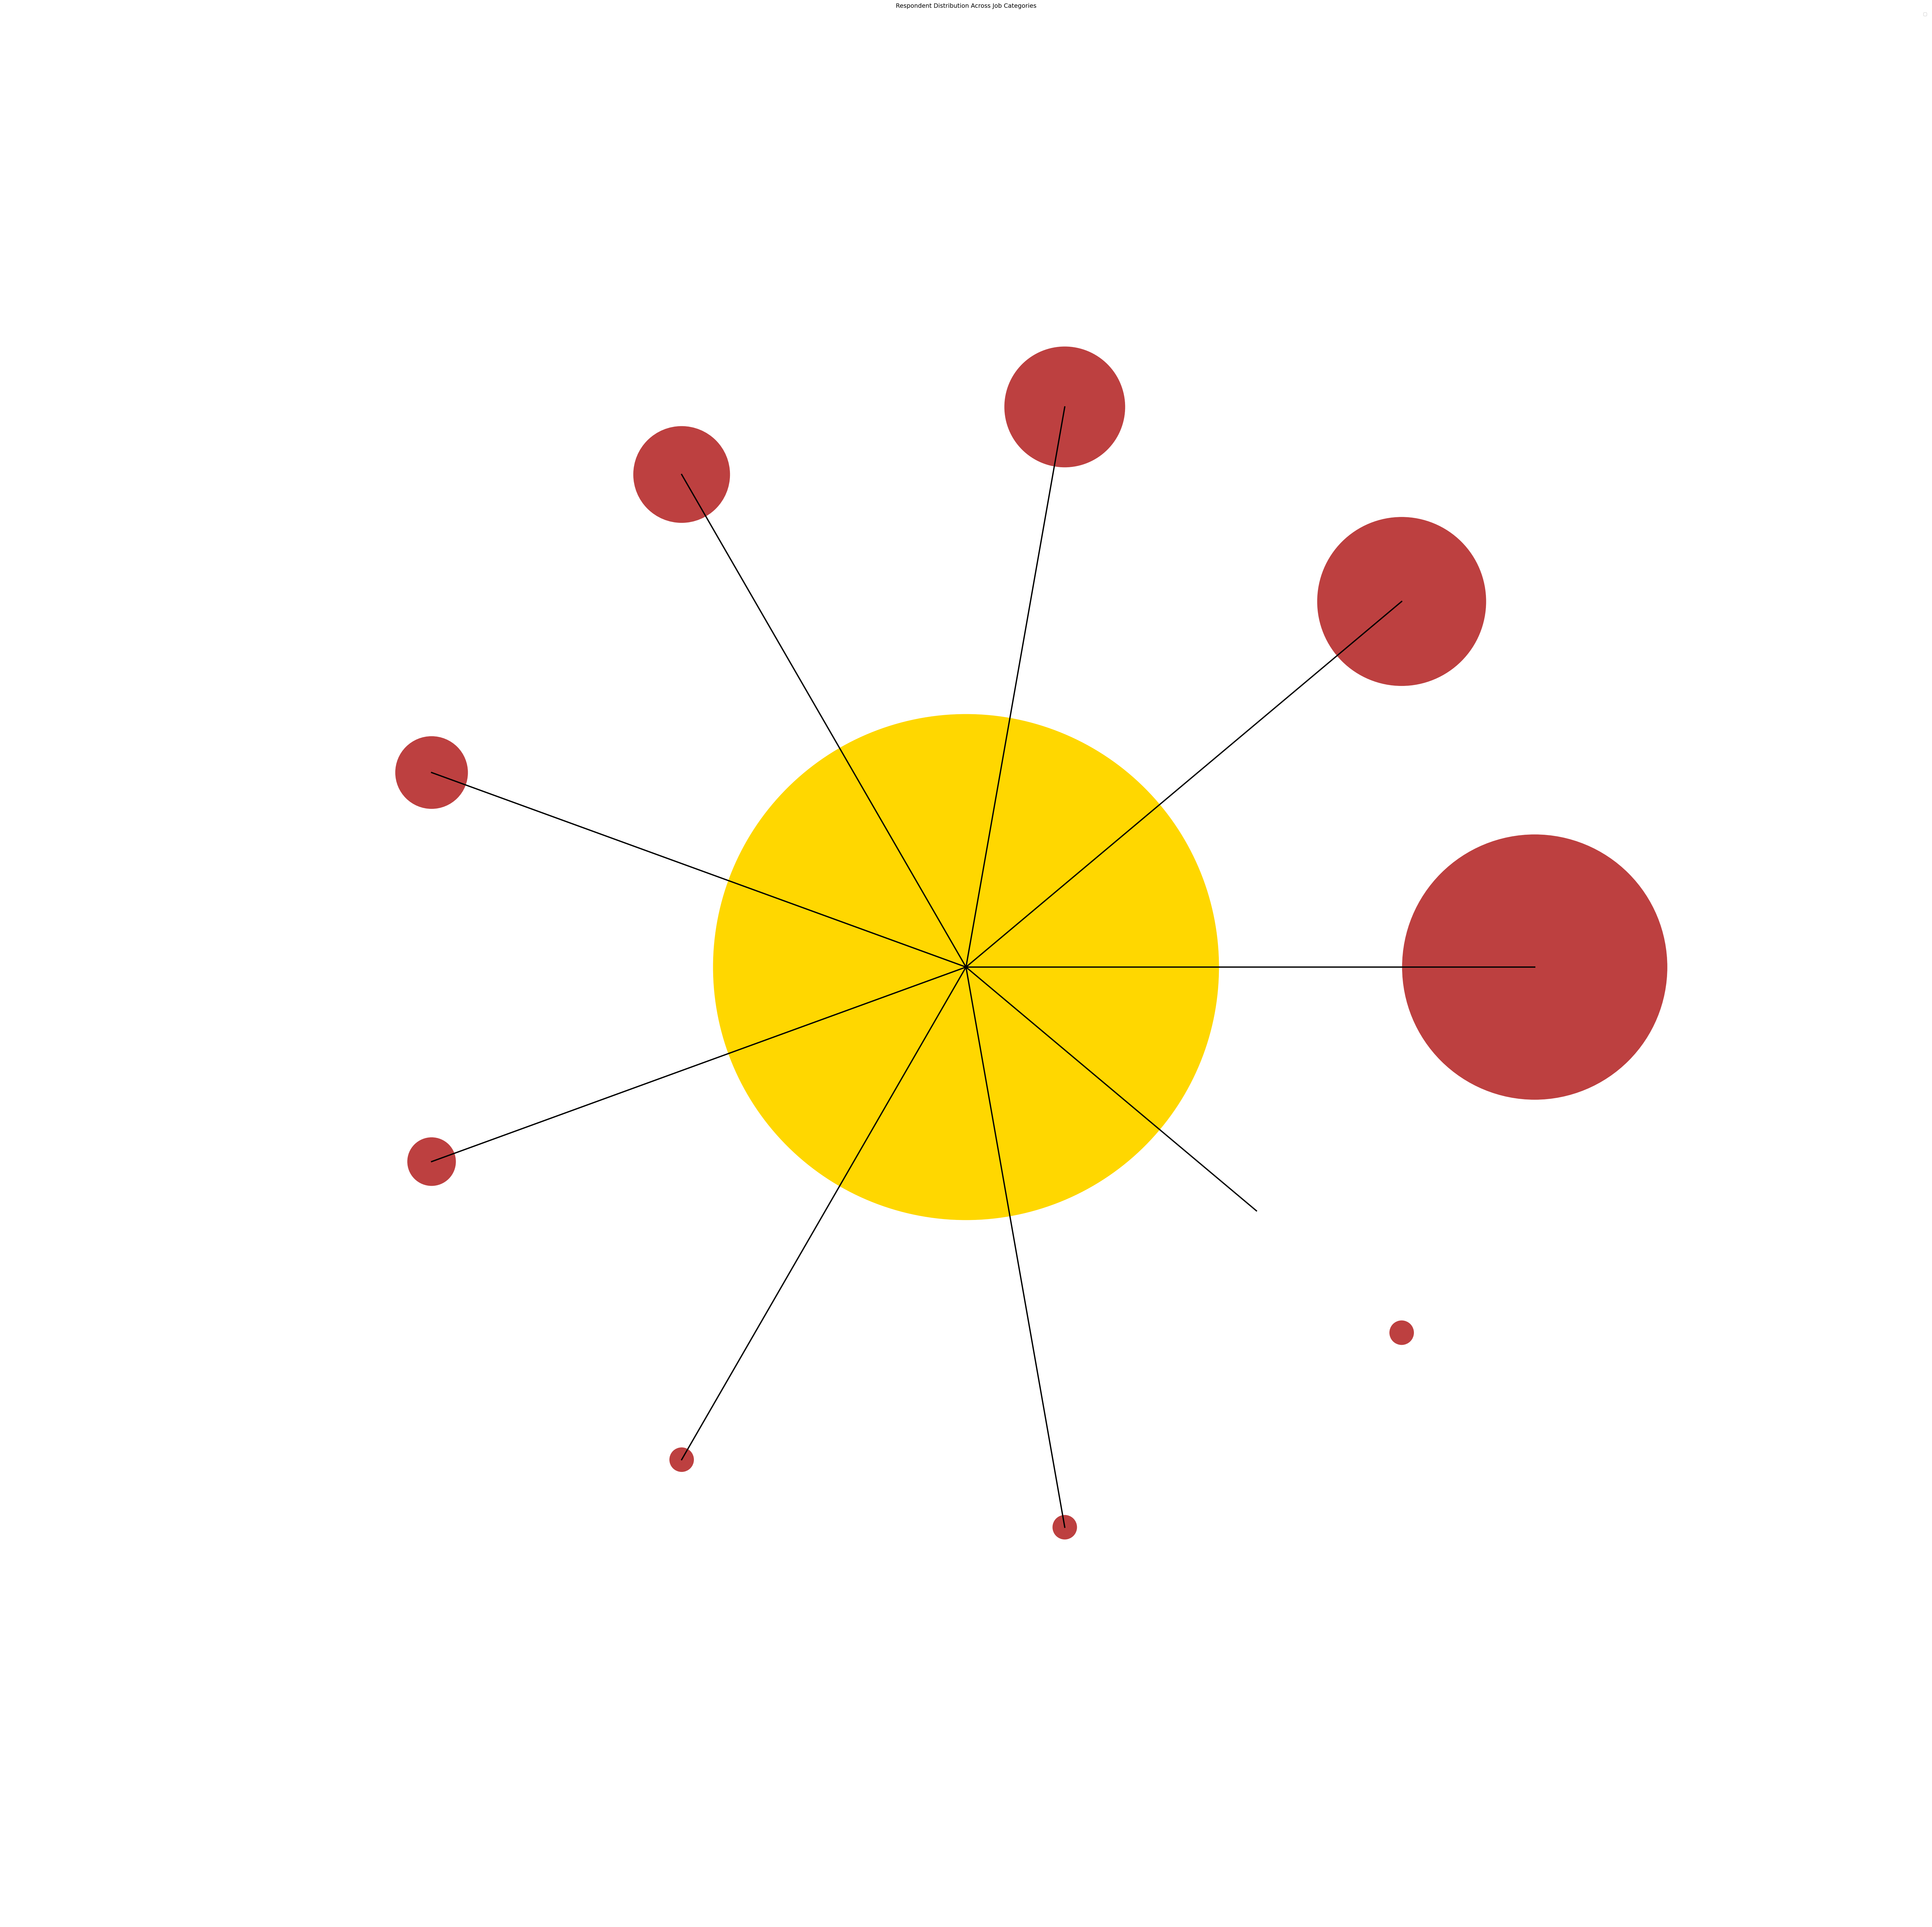

In [79]:
import numpy as np

# Data for the visualization
categories = ['Actors', 'Technicians', 'Educators', 'Directors', 
              'Choreographers', 'Writers', 'Designers', 'Producers', 'Administrators']
counts = [11, 7, 5, 4, 3, 2, 1, 1, 1]
total_respondents = 21

# Setting up the figure
plt.figure(figsize=(80, 80))
ax = plt.gca()

# Central circle representing total respondents, now in gold
central_circle = plt.Circle((0, 0), total_respondents/4, color='gold', alpha=1)
ax.add_patch(central_circle)

# Adjusting the distance of the outer circles from the center
#distance_multiplier = 1.5 * 1.5  # increased by 50%

# Adding smaller circles for each category, now in '#bd4040'
angle = 0
for category, count in zip(categories, counts):
    # Connect the circle to the center
    plt.plot([0, x], [0, y], 'k-', lw=3)
    
    # Position and size of the circle
    x = distance_multiplier * (total_respondents/4) * np.cos(angle)
    y = distance_multiplier * (total_respondents/4) * np.sin(angle)
    radius = count/4
    circle = plt.Circle((x, y), radius, color='#bd4040', alpha=1)

    # Add circle to the plot
    ax.add_patch(circle)

    

    # Update angle for the next circle
    angle += 2 * pi / len(categories)

# Remove x & y axes
ax.axis('off')

# Set limits and labels
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.set_aspect('equal', adjustable='datalim')
plt.title('Respondent Distribution Across Job Categories', fontsize=14)
plt.legend(loc='upper right', fontsize=10)

# Show the plot
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


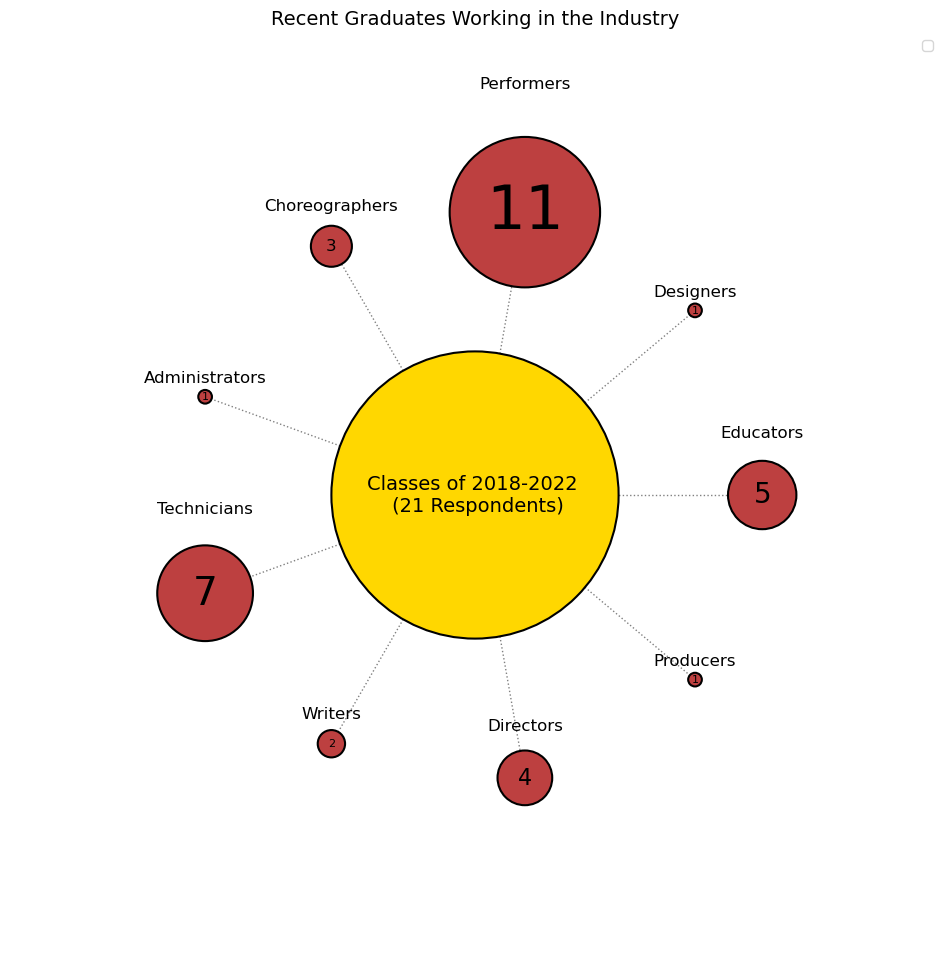

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# Data for the visualization
categories = ['Actors', 'Technicians', 'Educators', 'Directors', 
              'Choreographers', 'Writers', 'Designers', 'Producers', 'Administrators']
counts = [11, 7, 5, 4, 3, 2, 1, 1, 1]
categories = ['Educators', 'Designers', 'Performers', 'Choreographers', 'Administrators',
             'Technicians', 'Writers', 'Directors', 'Producers']
counts = [5, 1, 11, 3, 1, 7, 2, 4, 1]
total_respondents = 21

# Setting up the figure
plt.figure(figsize=(12, 12))  # Adjusted for a reasonable size
ax = plt.gca()


# Adjusting the distance of the outer circles from the center
distance_multiplier = 2  # Adjust as needed

# Drawing lines first
angle = 0
for category, count in zip(categories, counts):
    x = distance_multiplier * (total_respondents/4) * np.cos(angle)
    y = distance_multiplier * (total_respondents/4) * np.sin(angle)
    plt.plot([0, x], [0, y], color='gray', linestyle=':', lw=1, zorder=1)
    angle += 2 * np.pi / len(categories)

# Drawing circles
angle = 0
for category, count in zip(categories, counts):
    # Position and size of the circle
    x = distance_multiplier * (total_respondents/4) * np.cos(angle)
    y = distance_multiplier * (total_respondents/4) * np.sin(angle)
    radius = count/4
    circle = plt.Circle((x, y), radius, alpha=1, facecolor='#bd4040', edgecolor='black', linewidth=1.5, zorder=3)

    # Add circle to the plot
    ax.add_patch(circle)

    # Labeling the outer circles
    plt.text(x, y+(count/2.5), 
             category, 
             horizontalalignment='center', 
             verticalalignment='bottom', 
             fontsize=12, 
             color='black',
             zorder=4)
    
    font_me = count/2*8
    if font_me < 8:
        font_me = 8
    plt.text(x, y, 
             count, 
             horizontalalignment='center', 
             verticalalignment='center', 
             fontsize=(font_me), 
             color='black',
             zorder=4)

    # Update angle for the next circle
    angle += 2 * np.pi / len(categories)

# Central circle representing total respondents, now in gold
central_circle = plt.Circle((0, 0), 
                            total_respondents/4, 
                            alpha=1, 
                            facecolor='gold', 
                            edgecolor='black', 
                            linewidth=1.5,
                            zorder=3)
plt.text(0, 0, 
             'Classes of 2018-2022 \n (21 Respondents)', 
             horizontalalignment='center', 
             verticalalignment='center', 
             fontsize=14, 
             color='black',
             zorder=4)
ax.add_patch(central_circle)    

# Remove x & y axes
ax.axis('off')

# Set limits and labels
ax.set_xlim(-17, 17)
ax.set_ylim(-17, 17)
ax.set_aspect('equal', adjustable='datalim')
plt.title('Recent Graduates Working in the Industry', fontsize=14)
plt.legend(loc='upper right', fontsize=10)

# Show the plot
plt.show()


In [108]:
five.columns

Index(['Time', 'Email', 'Name', 'GradYear', 'RecentJobs', 'CurrentJob',
       'FutureJobs', 'Job Discipline_Coding', 'IndustryJobs_Coding', 'WhyUMD',
       'WhyUMD_Coding', 'FutureEntInd', 'ContactInfo', 'ExpectationsMet',
       'exceeded', 'ValuableExperiences', 'ValuableExp_Coding', 'DegreeImpact',
       'Transferrable_Coding', 'Coding'],
      dtype='object')